In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
# Preprocess the data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


In [4]:
# Data augmentation
datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1)
datagen.fit(x_train)

In [5]:
# Build and compile model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [6]:
# Train the model with data augmentation
history = model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=15, validation_data=(x_test, y_test))


Epoch 1/15
1875/1875 [==============================] - 80s 42ms/step - loss: 0.3709 - accuracy: 0.8824 - val_loss: 0.0477 - val_accuracy: 0.9834
Epoch 2/15
1875/1875 [==============================] - 80s 43ms/step - loss: 0.1515 - accuracy: 0.9541 - val_loss: 0.0266 - val_accuracy: 0.9903
Epoch 3/15
1875/1875 [==============================] - 85s 45ms/step - loss: 0.1155 - accuracy: 0.9661 - val_loss: 0.0227 - val_accuracy: 0.9923
Epoch 4/15
1875/1875 [==============================] - 87s 46ms/step - loss: 0.0962 - accuracy: 0.9719 - val_loss: 0.0268 - val_accuracy: 0.9907
Epoch 5/15
1875/1875 [==============================] - 89s 47ms/step - loss: 0.0867 - accuracy: 0.9746 - val_loss: 0.0228 - val_accuracy: 0.9927
Epoch 6/15
1875/1875 [==============================] - 92s 49ms/step - loss: 0.0789 - accuracy: 0.9769 - val_loss: 0.0214 - val_accuracy: 0.9923
Epoch 7/15
1875/1875 [==============================] - 85s 45ms/step - loss: 0.0723 - accuracy: 0.9793 - val_loss: 0.0173 -

In [7]:
# Evaluate the model
model.evaluate(x_test, y_test)


313/313 [==============================] - 6s 17ms/step - loss: 0.0167 - accuracy: 0.9943


[0.01666933111846447, 0.9943000078201294]

In [8]:
# Predict labels
y_predicts = model.predict(x_test)
y_predicts = np.argmax(y_predicts, axis=1)

In [9]:
# Generate the confusion matrix
y_test_eval = y_test

con_mat = confusion_matrix(y_test_eval, y_predicts)


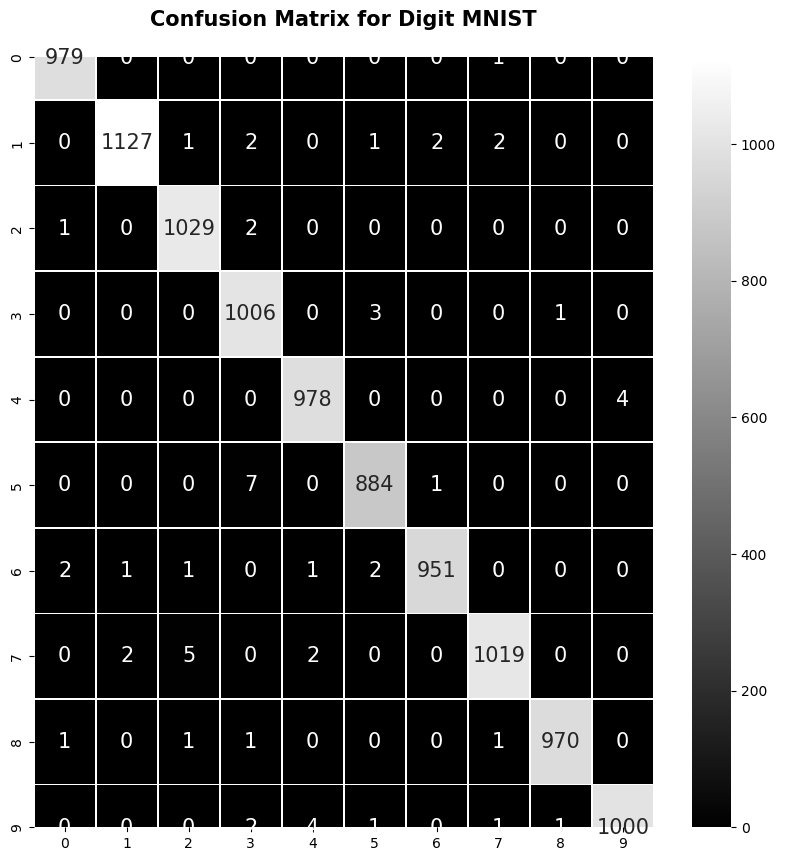

In [10]:
# Display the confusion matrix
plt.style.use('seaborn-deep')
plt.figure(figsize=(10, 10))
sns.heatmap(con_mat, annot=True, annot_kws={'size': 15}, linewidths=0.5, fmt="d", cmap="gray")
plt.title('Confusion Matrix for Digit MNIST\n', fontweight='bold', fontsize=15)
plt.show()


In [11]:
# Print classification report
print(classification_report(y_test_eval, y_predicts))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      0.99      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       1.00      0.99      0.99      1028
           8       1.00      1.00      1.00       974
           9       1.00      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



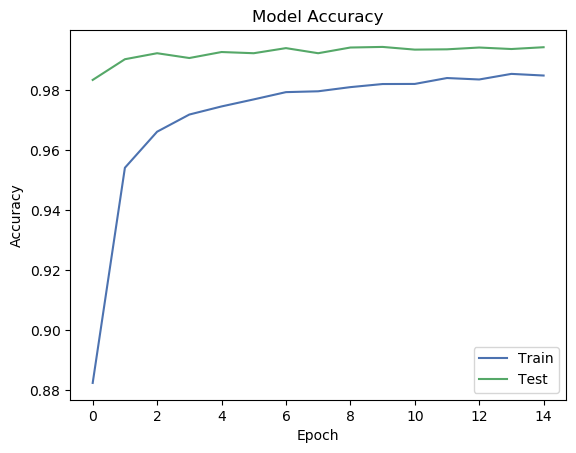

In [12]:
# Plot accuracy and loss over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

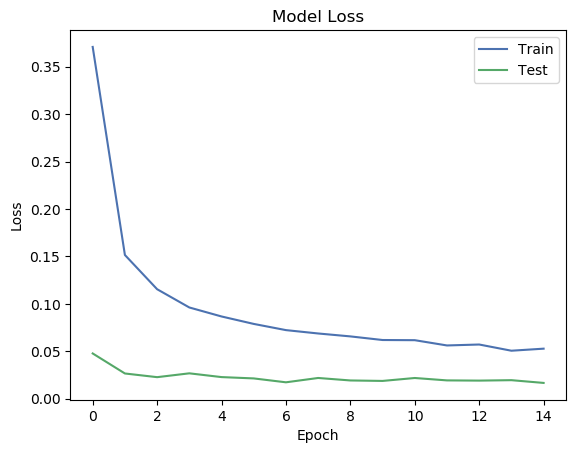

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()



6


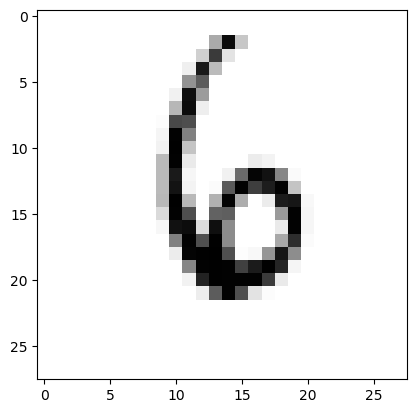

In [14]:
import matplotlib.pyplot as plt
image_index = 6900
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
predict = x_test[image_index].reshape(28,28)
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())